# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [18]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
df = pd.read_csv("data/WHR2018Chapter2OnlineData.csv")

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Visualize data
print(df.shape)
df.head(df.shape[0])

(1562, 19)


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


In [5]:
# Filter out columns we don't use
columns = ["country","year","Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Confidence in national government", "gini of household income reported in Gallup, by wp5-year"]
df = df[columns]

In [6]:
'''
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Confidence in national government                           float64
gini of household income reported in Gallup, by wp5-year    float64
dtype: object
'''

'\ncountry                                                      object\nyear                                                          int64\nLife Ladder                                                 float64\nLog GDP per capita                                          float64\nSocial support                                              float64\nHealthy life expectancy at birth                            float64\nFreedom to make life choices                                float64\nGenerosity                                                  float64\nPerceptions of corruption                                   float64\nConfidence in national government                           float64\ngini of household income reported in Gallup, by wp5-year    float64\ndtype: object\n'

### Finding and replacing missing values

In [7]:
# Check if there's any missing values at all
missing = df.isnull().values.any()
print("Has missing values:", missing)

# Count how many values of each feature is null
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Has missing values: True
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Confidence in national government                           161
gini of household income reported in Gallup, by wp5-year    357
dtype: int64


In [8]:
missing_val_col = df.columns[df.isnull().any()].tolist()

# Since there's is (return True), we'll find those missing values and replace them 
# with mean (since the dataset is not large enough to discard those missing values)
for col in missing_val_col:
    df.loc[:, col] = df[col].fillna(value=df[col].mean())

In [9]:
# Make sure there's no column with missing values
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Confidence in national government                           0
gini of household income reported in Gallup, by wp5-year    0
dtype: int64


### Rename & finding + replacing outliers

In [10]:
# Rename
df.rename(columns={'gini of household income reported in Gallup, by wp5-year': 'wealth distribution', 'Freedom to make life choices': 'Freedom', "Confidence in national government": "confidence in government"}, inplace=True)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom,Generosity,Perceptions of corruption,confidence in government,wealth distribution
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.612072,0.445204
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.611545,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.299357,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.307386,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.435440,0.344540


In [11]:
# Finding + replacing outliers
to_check_col = ["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom","Generosity","Perceptions of corruption","confidence in government", "wealth distribution"]

z_lim = 3.0

# Calculate z-scores for the specified columns in the DataFrame
z_scores = pd.DataFrame()
for col in to_check_col:
    z_scores[col] = np.abs((df[col] - df[col].mean()) / df[col].std())
    
    # Replace outliers with mean value for each column
    df[col] = np.where(z_scores[col] > z_lim, df[col].mean(), df[col]) 

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [12]:
# Create labels 
y = df['Life Ladder']
X = df.drop(columns=["Life Ladder"])

In [13]:
# One-hot coding to convert country column into numerical values
X_encoded = pd.get_dummies(X, columns=['country'], drop_first=True)

In [14]:
# Split data (60-20-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1234)

In [15]:
# Linear Regression model
lr_model = LinearRegression()

# 2. Fit model
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

In [16]:
# Evaluate model performance
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f'[LR] Root Mean Squared Error: {lr_rmse}')
print(f'[LR] R2: {lr_r2}')

[LR] Root Mean Squared Error: 0.3772827798941655
[LR] R2: 0.8903582907723816


### Search for best hyperparameters using GridSearch()

Now we'll attempt to use decision trees to see if it might be a better fit for this paticular scenerio. First, we'll find the most optimized hyperparemeter using GridSearch()

In [47]:
param_grid = {'max_depth' : [7,15] ,'min_samples_leaf' : [15,30]}

In [48]:
dt_regressor = DecisionTreeRegressor()

# Dataset will be split into 3 subsets for cross-validation
# Use negative of the root mean squared error to search for the lowest RMSE
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
 
dt_grid_search = dt_grid.fit(X_train, y_train)

In [49]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.57


In [50]:
dt_best_params = dt_grid_search.best_params_

dt_best_params

{'max_depth': 7, 'min_samples_leaf': 15}

In [51]:
# Create another decision tree model using the optimized parameters
dt_model = DecisionTreeRegressor(max_depth = dt_best_params['max_depth'], min_samples_leaf = dt_best_params['min_samples_leaf'])

dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)

# Evaluate accuracy & rmse
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.537098178545234
[DT] R2: 0.7777973727649473


### Visualize Model Performance
Great! Now that we've built a decision tree model with the optimized hyperparameters, let's visualize the performance of the two models!

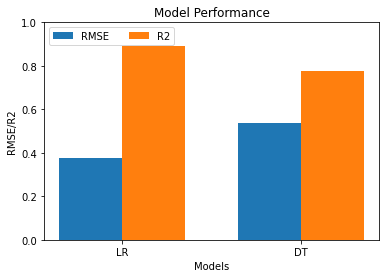

In [52]:
RMSE_Results = [lr_rmse, dt_rmse]
R2_Results = [lr_r2, dt_r2]
labels = ['LR', 'DT'] # Linear Regression & Decision trees

rg= np.arange(2)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Since both metrics measure different aspect of the model and provide differnt insights into the performance, we need to consider both metric when evaluating how well both models perform. Ideally, we would want a model with a high R2 and a low RMSE so....what do you think? Which model perform better (look at the graph above!)